In [29]:
import pandas as pd

In [30]:
path = "/content/drive/MyDrive/Colab Notebooks/dhaka.csv"

In [35]:
weather= pd.read_csv(path,index_col="DATE")

In [36]:
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
2023-11-11,BGM00041923,"TEJGAON, BG",0.0,25.7,31.5,20.7
2023-11-12,BGM00041923,"TEJGAON, BG",0.0,26.0,31.6,20.8
2023-11-13,BGM00041923,"TEJGAON, BG",0.0,25.8,31.9,20.9
2023-11-14,BGM00041923,"TEJGAON, BG",0.0,26.0,NaN,20.6
2023-11-15,BGM00041923,"TEJGAON, BG",0.0,27.2,32.7,21.0
...,...,...,...,...,...,...
2024-11-06,BGM00041923,"TEJGAON, BG",3.0,25.1,31.5,20.6
2024-11-07,BGM00041923,"TEJGAON, BG",0.0,26.4,NaN,21.7
2024-11-08,BGM00041923,"TEJGAON, BG",0.0,26.8,NaN,22.4


In [37]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]

In [38]:
weather.apply(pd.isnull).sum()

,0
STATION,0
NAME,0
PRCP,10
TAVG,0
TMAX,178
TMIN,79


In [39]:
null_pct

,0
STATION,0.000000
NAME,0.000000
PRCP,0.028902
TAVG,0.000000
TMAX,0.514451
TMIN,0.228324


In [40]:
valid_columns = weather.columns[null_pct < .5]

In [41]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'TAVG', 'TMIN'], dtype='object')

In [42]:
weather = weather[valid_columns].copy()

In [43]:
weather.columns = weather.columns.str.lower()

In [44]:
weather

,station,name,prcp,tavg,tmin
DATE,,,,,
2023-11-11,BGM00041923,"TEJGAON, BG",0.0,25.7,20.7
2023-11-12,BGM00041923,"TEJGAON, BG",0.0,26.0,20.8
2023-11-13,BGM00041923,"TEJGAON, BG",0.0,25.8,20.9
2023-11-14,BGM00041923,"TEJGAON, BG",0.0,26.0,20.6
2023-11-15,BGM00041923,"TEJGAON, BG",0.0,27.2,21.0
...,...,...,...,...,...
2024-11-06,BGM00041923,"TEJGAON, BG",3.0,25.1,20.6
2024-11-07,BGM00041923,"TEJGAON, BG",0.0,26.4,21.7
2024-11-08,BGM00041923,"TEJGAON, BG",0.0,26.8,22.4


In [45]:
weather = weather.ffill()

In [46]:
weather.apply(pd.isnull).sum()

,0
station,0
name,0
prcp,0
tavg,0
tmin,0


In [47]:
weather.dtypes

,0
station,object
name,object
prcp,float64
tavg,float64
tmin,float64


In [48]:
weather.index

Index(['2023-11-11', '2023-11-12', '2023-11-13', '2023-11-14', '2023-11-15',
       '2023-11-16', '2023-11-17', '2023-11-18', '2023-11-19', '2023-11-20',
       ...
       '2024-11-01', '2024-11-02', '2024-11-03', '2024-11-04', '2024-11-05',
       '2024-11-06', '2024-11-07', '2024-11-08', '2024-11-09', '2024-11-10'],
      dtype='object', name='DATE', length=346)

In [49]:
weather.index = pd.to_datetime(weather.index)

In [50]:
weather.index.month.value_counts().sort_index()

,count
DATE,
1,31
2,29
3,27
4,23
5,30
6,28
7,26
8,30
9,30


<Axes: xlabel='DATE'>

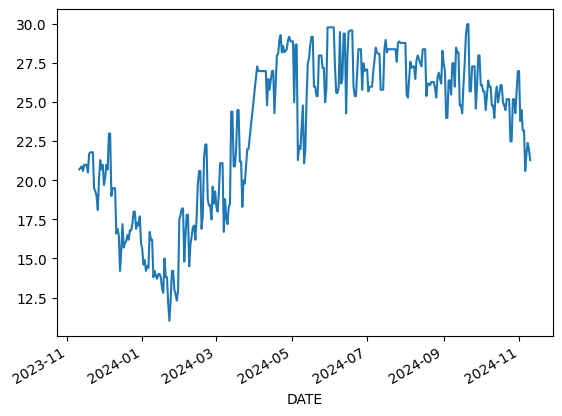

In [51]:
weather["tmin"].plot()

In [52]:
weather

,station,name,prcp,tavg,tmin
DATE,,,,,
2023-11-11,BGM00041923,"TEJGAON, BG",0.0,25.7,20.7
2023-11-12,BGM00041923,"TEJGAON, BG",0.0,26.0,20.8
2023-11-13,BGM00041923,"TEJGAON, BG",0.0,25.8,20.9
2023-11-14,BGM00041923,"TEJGAON, BG",0.0,26.0,20.6
2023-11-15,BGM00041923,"TEJGAON, BG",0.0,27.2,21.0
...,...,...,...,...,...
2024-11-06,BGM00041923,"TEJGAON, BG",3.0,25.1,20.6
2024-11-07,BGM00041923,"TEJGAON, BG",0.0,26.4,21.7
2024-11-08,BGM00041923,"TEJGAON, BG",0.0,26.8,22.4


In [53]:
weather["target"]= weather.shift(-1)["tmin"]

In [54]:
weather

,station,name,prcp,tavg,tmin,target
DATE,,,,,,
2023-11-11,BGM00041923,"TEJGAON, BG",0.0,25.7,20.7,20.8
2023-11-12,BGM00041923,"TEJGAON, BG",0.0,26.0,20.8,20.9
2023-11-13,BGM00041923,"TEJGAON, BG",0.0,25.8,20.9,20.6
2023-11-14,BGM00041923,"TEJGAON, BG",0.0,26.0,20.6,21.0
2023-11-15,BGM00041923,"TEJGAON, BG",0.0,27.2,21.0,21.0
...,...,...,...,...,...,...
2024-11-06,BGM00041923,"TEJGAON, BG",3.0,25.1,20.6,21.7
2024-11-07,BGM00041923,"TEJGAON, BG",0.0,26.4,21.7,22.4
2024-11-08,BGM00041923,"TEJGAON, BG",0.0,26.8,22.4,22.0


In [55]:
weather = weather.ffill()

In [56]:
weather

,station,name,prcp,tavg,tmin,target
DATE,,,,,,
2023-11-11,BGM00041923,"TEJGAON, BG",0.0,25.7,20.7,20.8
2023-11-12,BGM00041923,"TEJGAON, BG",0.0,26.0,20.8,20.9
2023-11-13,BGM00041923,"TEJGAON, BG",0.0,25.8,20.9,20.6
2023-11-14,BGM00041923,"TEJGAON, BG",0.0,26.0,20.6,21.0
2023-11-15,BGM00041923,"TEJGAON, BG",0.0,27.2,21.0,21.0
...,...,...,...,...,...,...
2024-11-06,BGM00041923,"TEJGAON, BG",3.0,25.1,20.6,21.7
2024-11-07,BGM00041923,"TEJGAON, BG",0.0,26.4,21.7,22.4
2024-11-08,BGM00041923,"TEJGAON, BG",0.0,26.8,22.4,22.0


In [63]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha = .1)

In [65]:
predictors = weather.columns[~weather.columns.isin(["target","name","station"])]

In [66]:
predictors

Index(['prcp', 'tavg', 'tmin'], dtype='object')

In [90]:
def backtest(weather, model, predictors, start=136, step=7):
    all_predictions = []
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i, :]
        test = weather.iloc[i:(i+step), :]
        model.fit(train[predictors], train["target"])
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [91]:
predictions = backtest(weather, rr, predictors)

In [92]:
predictions

,actual,prediction,diff
DATE,,,
2024-03-26,22.0,22.138184,0.138184
2024-03-27,27.3,23.704742,3.595258
2024-04-03,27.0,25.990778,1.009222
2024-04-04,27.0,26.346644,0.653356
2024-04-10,24.8,25.192834,0.392834
...,...,...,...
2024-11-06,21.7,20.996013,0.703987
2024-11-07,22.4,22.223786,0.176214
2024-11-08,22.0,22.779932,0.779932


In [94]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions["actual"],predictions["prediction"])

1.0894806488927775

In [98]:
def pct_diff(old,new):
  return (new-old)/old

def compute_rolling(weather, horizon,col):
  label = f"rolling_{horizon}_{col}"
  weather[label] =weather[col].rolling(horizon).mean()
  weather[f"{label}_pct"] = pct_diff(weather[label],weather[col])
  return weather
rolling_horizons = [3, 14]

for horizon in rolling_horizons:
  for col in ["tavg","tmin","prcp"]:
    weather = compute_rolling(weather,horizon,col)

In [99]:
weather

,station,name,prcp,tavg,tmin,target,rolling_3_tavg,rolling_3_tavg_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tavg,rolling_14_tavg_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,
2023-11-11,BGM00041923,"TEJGAON, BG",0.0,25.7,20.7,20.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-12,BGM00041923,"TEJGAON, BG",0.0,26.0,20.8,20.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-13,BGM00041923,"TEJGAON, BG",0.0,25.8,20.9,20.6,25.833333,-1.290323e-03,20.800000,0.004808,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-14,BGM00041923,"TEJGAON, BG",0.0,26.0,20.6,21.0,25.933333,2.570694e-03,20.766667,-0.008026,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-15,BGM00041923,"TEJGAON, BG",0.0,27.2,21.0,21.0,26.333333,3.291139e-02,20.833333,0.008000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-06,BGM00041923,"TEJGAON, BG",3.0,25.1,20.6,21.7,27.066667,-7.266010e-02,22.333333,-0.077612,7.433333,-0.596413,28.164286,-0.108800,24.271429,-0.151265,2.742857,0.09375
2024-11-07,BGM00041923,"TEJGAON, BG",0.0,26.4,21.7,22.4,26.400000,-2.691450e-16,21.833333,-0.006107,7.433333,-1.000000,28.285714,-0.066667,24.021429,-0.096640,1.635714,-1.00000
2024-11-08,BGM00041923,"TEJGAON, BG",0.0,26.8,22.4,22.0,26.100000,2.681992e-02,21.566667,0.038640,1.000000,-1.000000,28.185714,-0.049164,24.014286,-0.067222,1.614286,-1.00000


In [100]:
weather = weather.iloc[14:,:]

In [101]:
weather

,station,name,prcp,tavg,tmin,target,rolling_3_tavg,rolling_3_tavg_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tavg,rolling_14_tavg_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,
2023-11-25,BGM00041923,"TEJGAON, BG",0.0,23.7,19.0,18.1,23.800000,-4.201681e-03,19.266667,-1.384083e-02,0.000000,NaN,24.992857,-0.051729,20.764286,-0.084967,2.335714,-1.00000
2023-11-26,BGM00041923,"TEJGAON, BG",0.0,24.3,18.1,20.1,23.933333,1.532033e-02,18.800000,-3.723404e-02,0.000000,NaN,24.871429,-0.022975,20.571429,-0.120139,2.335714,-1.00000
2023-11-27,BGM00041923,"TEJGAON, BG",0.0,25.8,20.1,21.3,24.600000,4.878049e-02,19.066667,5.419580e-02,0.000000,NaN,24.871429,0.037335,20.514286,-0.020195,2.335714,-1.00000
2023-11-28,BGM00041923,"TEJGAON, BG",0.0,26.1,21.3,20.7,25.400000,2.755906e-02,19.833333,7.394958e-02,0.000000,NaN,24.878571,0.049096,20.564286,0.035776,2.335714,-1.00000
2023-11-29,BGM00041923,"TEJGAON, BG",0.0,24.8,20.7,21.0,25.566667,-2.998696e-02,20.700000,-1.716287e-16,0.000000,NaN,24.707143,0.003758,20.542857,0.007650,2.335714,-1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-06,BGM00041923,"TEJGAON, BG",3.0,25.1,20.6,21.7,27.066667,-7.266010e-02,22.333333,-7.761194e-02,7.433333,-0.596413,28.164286,-0.108800,24.271429,-0.151265,2.742857,0.09375
2024-11-07,BGM00041923,"TEJGAON, BG",0.0,26.4,21.7,22.4,26.400000,-2.691450e-16,21.833333,-6.106870e-03,7.433333,-1.000000,28.285714,-0.066667,24.021429,-0.096640,1.635714,-1.00000
2024-11-08,BGM00041923,"TEJGAON, BG",0.0,26.8,22.4,22.0,26.100000,2.681992e-02,21.566667,3.863988e-02,1.000000,-1.000000,28.185714,-0.049164,24.014286,-0.067222,1.614286,-1.00000


In [102]:
weather = weather.fillna(0)

In [103]:
def expand_mean(df):
  return df.expanding(1).mean()
  for col in ["tavg","tmin","prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg{col}"] = weather[col].groupby(weather.index.day_of_year,group_keys=False).apply(expand_mean)

In [104]:
weather

,station,name,prcp,tavg,tmin,target,rolling_3_tavg,rolling_3_tavg_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tavg,rolling_14_tavg_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,
2023-11-25,BGM00041923,"TEJGAON, BG",0.0,23.7,19.0,18.1,23.800000,-4.201681e-03,19.266667,-1.384083e-02,0.000000,0.000000,24.992857,-0.051729,20.764286,-0.084967,2.335714,-1.00000
2023-11-26,BGM00041923,"TEJGAON, BG",0.0,24.3,18.1,20.1,23.933333,1.532033e-02,18.800000,-3.723404e-02,0.000000,0.000000,24.871429,-0.022975,20.571429,-0.120139,2.335714,-1.00000
2023-11-27,BGM00041923,"TEJGAON, BG",0.0,25.8,20.1,21.3,24.600000,4.878049e-02,19.066667,5.419580e-02,0.000000,0.000000,24.871429,0.037335,20.514286,-0.020195,2.335714,-1.00000
2023-11-28,BGM00041923,"TEJGAON, BG",0.0,26.1,21.3,20.7,25.400000,2.755906e-02,19.833333,7.394958e-02,0.000000,0.000000,24.878571,0.049096,20.564286,0.035776,2.335714,-1.00000
2023-11-29,BGM00041923,"TEJGAON, BG",0.0,24.8,20.7,21.0,25.566667,-2.998696e-02,20.700000,-1.716287e-16,0.000000,0.000000,24.707143,0.003758,20.542857,0.007650,2.335714,-1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-06,BGM00041923,"TEJGAON, BG",3.0,25.1,20.6,21.7,27.066667,-7.266010e-02,22.333333,-7.761194e-02,7.433333,-0.596413,28.164286,-0.108800,24.271429,-0.151265,2.742857,0.09375
2024-11-07,BGM00041923,"TEJGAON, BG",0.0,26.4,21.7,22.4,26.400000,-2.691450e-16,21.833333,-6.106870e-03,7.433333,-1.000000,28.285714,-0.066667,24.021429,-0.096640,1.635714,-1.00000
2024-11-08,BGM00041923,"TEJGAON, BG",0.0,26.8,22.4,22.0,26.100000,2.681992e-02,21.566667,3.863988e-02,1.000000,-1.000000,28.185714,-0.049164,24.014286,-0.067222,1.614286,-1.00000


In [105]:
predictors = weather.columns[~weather.columns.isin(["target","name","station"])]

In [106]:
def backtest(weather, model, predictors, start=136, step=7):
    all_predictions = []
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i, :]
        test = weather.iloc[i:(i+step), :]
        model.fit(train[predictors], train["target"])
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [107]:
predictors

Index(['prcp', 'tavg', 'tmin', 'rolling_3_tavg', 'rolling_3_tavg_pct',
       'rolling_3_tmin', 'rolling_3_tmin_pct', 'rolling_3_prcp',
       'rolling_3_prcp_pct', 'rolling_14_tavg', 'rolling_14_tavg_pct',
       'rolling_14_tmin', 'rolling_14_tmin_pct', 'rolling_14_prcp',
       'rolling_14_prcp_pct'],
      dtype='object')

In [108]:
predictions = backtest(weather, rr, predictors)

In [109]:
predictions

,actual,prediction,diff
DATE,,,
2024-04-20,29.0,28.066631,0.933369
2024-04-21,29.3,28.019155,1.280845
2024-04-22,28.2,28.173130,0.026870
2024-04-23,28.6,28.108539,0.491461
2024-04-24,28.2,28.638129,0.438129
...,...,...,...
2024-11-06,21.7,21.269111,0.430889
2024-11-07,22.4,22.363336,0.036664
2024-11-08,22.0,22.705283,0.705283


In [111]:
mean_absolute_error(predictions["actual"],predictions["prediction"])

0.921780319449255

In [112]:
predictions.sort_values("diff",ascending=False)

,actual,prediction,diff
DATE,,,
2024-05-05,21.3,26.814330,5.514330
2024-05-28,25.8,30.562411,4.762411
2024-05-10,21.1,25.477558,4.377558
2024-05-27,25.0,20.721266,4.278734
2024-05-02,25.0,28.131098,3.131098
...,...,...,...
2024-04-30,28.9,28.931864,0.031864
2024-06-19,26.0,25.969694,0.030306
2024-04-22,28.2,28.173130,0.026870


<Axes: xlabel='diff'>

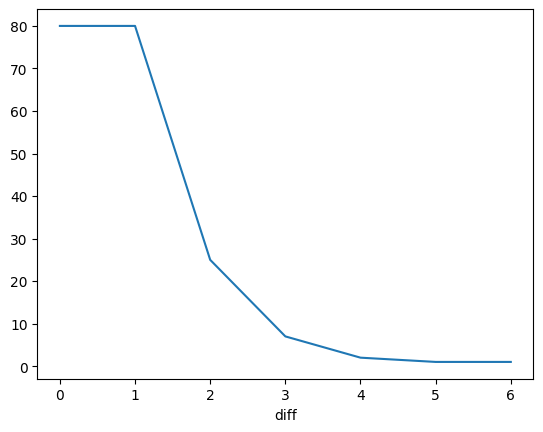

In [113]:
predictions["diff"].round().value_counts().sort_index().plot()